# ER190C Final Project (replace this with your project title)
Fall, 2018

In this cell, give an alphabetical (by last name) list of student group members.  Beside each student's name, provide a description of what each student did. 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp

## Abstract (5 points)
Rising rents and neighborhood change in San Francisco over the last 10 years have decreased the affordability of the rental housing market for working and middle class households in the city. Research suggests that these changes have led to widespread displacement from San Francisco, a portion of which can be modeled with eviction statistics. Others have employed the use of machine learning techniques to predict gentrification and neighborhood change, and a more limited set of studies have attempted to predict evictions. I used time lagged data on demographics, the built environment and transportation access to predict eviction rates by census tracts in San Francisco using Ridge, Random Forest and K-Nearest Neighbors regression. Ridge and KNN generalized well with high predictive accuracy, and provides an effective starting point for more robust and explainable predictive models to be used by policymakers and housing advocates. 



## Project Background (5 points)
Eviction can have devastating effects on individual households, increasing susceptibility to homelessness, reducing access to credit, disrupting children's academic performance <cite data-cite="6336556/4QEZN9SC"></cite> and  increasing stress and depression <cite data-cite="6336556/UQL6UVGE"></cite>. Widespread evictions, especially those associated with Ellis act invocations and condo conversions, can destabilize communities, reduce social networks and decrease social capital of marginalized residents. Eviction is a widespread problem across lower income communities across racial groups, but research suggests that Black and Hispanic renters are particularly vulnerable, at least in some markets. <cite data-cite="6336556/JI2BU5J8"></cite> As major cities nationwide become increasingly unaffordable and socioeconomically homogenous, a significant amount of research has employed the use of statistical methods, including predictive models, to investigate trends such as gentrification <cite data-cite="6336556/A69SNZW5"></cite>, residential mobility <cite data-cite="6336556/5J52DF82"></cite>, eviction <cite data-cite="6336556/7FPVL4DT"></cite>, crime, wealth, and even changes in the built environment <cite data-cite="6336556/XNKWE6KL"></cite>. Predicting indicators of neighborhood change such as evictions can be helpful, serving as early warning signs that can encourage proactive policies, such as increased affordable housing accomodation, provide evidence for controversial policies such as rent stabilization measures, or indicate a need to allocate resources to particular public agencies or funds. A study by Matthew Desmond and Carl Gershenson tested a host of individual and neighborhood level characteristics (at the block group level) in their analysis of eviction trends in Milwaukee, using a discrete hazard model to assess how these characteristics influenced the whether households were evicted, and when. <cite data-cite="undefined"></cite> A project by Kenny Durrell available on github used a random forest regressor and a top-down hierarchical ARIMAX model to predict evictions by zip code in San Francisco, using Open SF’s eviction notice dataset, which includes eviction data from 1997-2018 by address. <cite data-cite="6336556/H77PJNWG"></cite> This project takes an innovative approach to the eviction prediction problem by using some time lagged features. Though the project report does not mention the justification, the use of time lagged features is appropriate for predicting evictions since it is consistent with literature about neighborhood change, which suggests that there is the substantial delay between demographic and economic shifts and resulting neighborhood change (ie: eviction rates). This project served as the primary inspiration for my model, but I employed the use of two additional algorithms (Ridge and KNN) and used LASSO to the select the most relevant from a broader set of features, including transportation features and relationships with neighboring geographies that Durrell’s project did not address. Most significantly, I felt that the zip code was too coarse of a scale to draw meaningful conclusions about neighborhood-level evictions rates (for instance, the majority of the Mission district in SF is one zip code), so I used census tract level features to predict the eviction rate instead. 


## Project Question (5 points)

1. What will be the eviction rate in each census tract in San Francisco in 2019?
2. How well can we predict the eviction rate of a census tract in San Francisco using a defined set of demographic, transportation and built environment related variables?

Both of these questions articulate the need to quantify the extent and dispersion of evictions in San Francisco. Determining where evictions are happening, and how many are happening can serve as early warning signs of neighborhood change and economic patterns. The information is also potentially helpful to social service organizations and arms of local government that may have resources available to help households and communities affected by the eviction crisis.   Perhaps most directly, quantifying and predicting evictions provides data that can help backup discussions about gentrification, homelessness and unfair real estate practices in city council meetings, the Planning department and the mayor’s office, where marginalized groups most affected by eviction are usually the least represented.
 

## Input Data Description (5 points)


**Eviction Data** <br>
**Source:** SFGov, “Eviction notices filed with the San Francisco Rent Board per San Francisco Administrative Code 37.9(c).” <br>
**Structure:** .csv<br>
**Granularity:** One eviction record per line, with time/date/location (lat/lon, zip code, address) information. One column for each type of eviction with a boolean variable indicating which type the eviction is.<br>
**Scope:** Unclear what fraction of actual evictions are present in the dataset, though legally all area supposed to be. --% of the data contains NaN elements in critical fields.<br>
**Temporality:** data is from 1997-2018<br>
**Faithfulness:** administrative dataset maintained by the city, no reason to believe there are any issues of misrepresentation, though eviction rates did seem artificially low to an untrained observer. <br><br>



**ACS Data** <br>
**Source:** American Community Survey, U.S. Census<br>
**Structure:** .csv<br>
**Granularity:** One census tract per line, separate file for each year. Margins of error included in dataset but not included in model. <br>
**Scope:**<br>
**Temporality:** Used ACS 5 YR estimates from: 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017 (to predict).<br>
**Faithfulness:** The American Community Survey is administered every year to a sample of the U.S. population. The 5YR estimates are compiled rolling averages from the 5 years preceding and including the published date (ie: 2015 estimates are rolling averages from 2011-2015). The ACS data has relatively high margins of error for some variables and suffers from similar non-response bias as the U.S. Census. Regardless, it is considered the most accurate available source on demographics by researchers and policymakers.<br><br>

**Muni bus stop data**<br>
**Source:** DataSF “SFMTA Transit Stop and Schedule Data”<br>
**Structure:** .txt<br>
**Granularity:** One Muni stop per line, including stop id, string name of location and lat/lon of location (used to geocode and aggregate by census tract).<br>
**Scope:** The dataset represents the full scope of Muni bus stops within the city of San Francisco.<br>
**Temporality:** not time specific<br>
**Faithfulness:** From official SFMTA administrative dataset, no reason to doubt faithfulness.<br><br>


**Commuter Shuttle Data**<br>
**Source:** Data.gov “Commuter Shuttle Stops”<br>
**Structure:** .shp<br>
**Granularity:** One commuter shuttle stop per line, including the from and to street of the route, string name of location and lat/lon of location (used to geocode and aggregate by census tract).<br>
**Scope:** The dataset represents the full scope of commuter shuttle stops registered with the commuter shuttle program within the city of San Francisco.<br>
**Temporality:** not time specific<br>
**Faithfulness:** From official SFMTA administrative dataset, no reason to doubt faithfulness.

## Data Cleaning (10 points)
In this section you will walk through the data cleaning and merging process.  Explain how you make decisions to clean and merge the data.  Explain how you convince yourself that the data don't contain problems that will limit your ability to produce a meaningful analysis from them.  

[Chapter 4](https://www.textbook.ds100.org/ch/04/cleaning_intro.html) of the DS100 textbook might be helpful to you in this section.  

## Data Summary and Exploratory Data Analysis (10 points)

In this section you should provide a tour through some of the basic trends and patterns in your data.  This includes providing initial plots to summarize the data, such as box plots, histograms, trends over time, scatter plots relating one variable or another.  

[Chapter 6](https://www.textbook.ds100.org/ch/06/viz_intro.html) of the DS100 textbook might be helpful for providing ideas for visualizations that describe your data.  

### Exploratory Feature Scatterplots

These plots help show underlying relationships between chosen features and the target variable (number of evictions per housing unit) in each census tract.

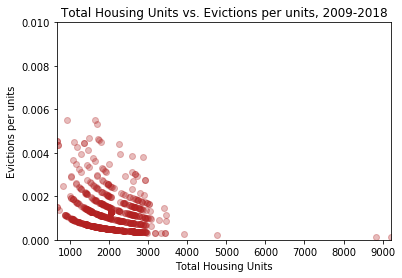

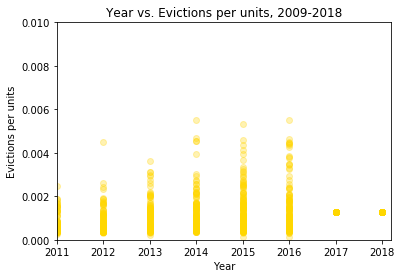

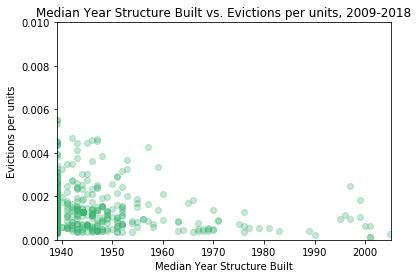

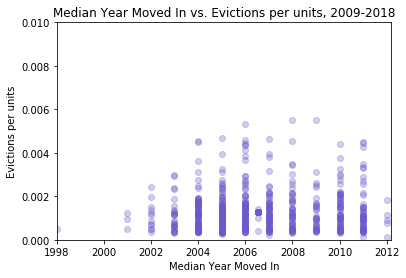

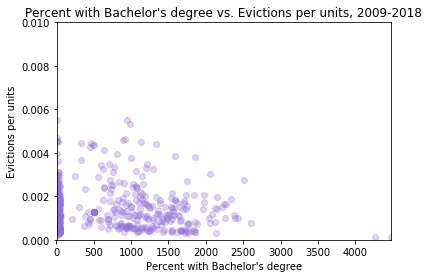

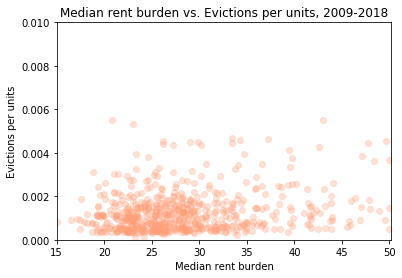

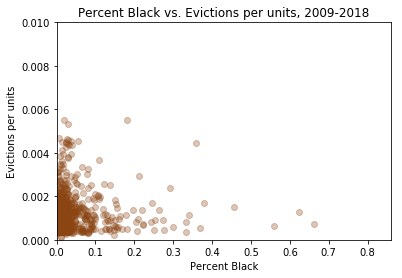

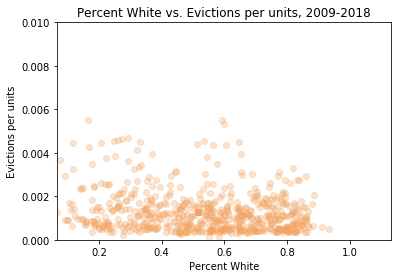

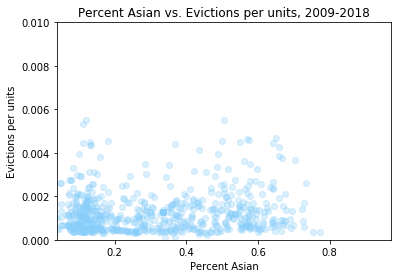

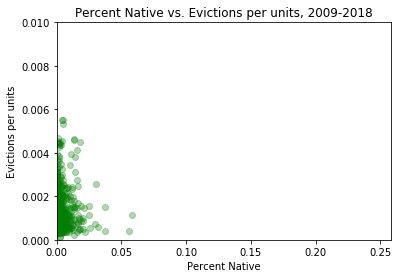

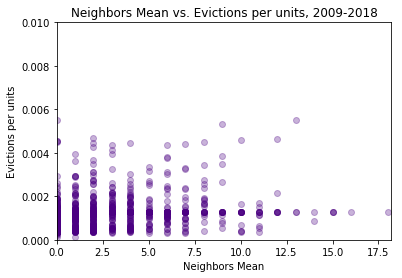

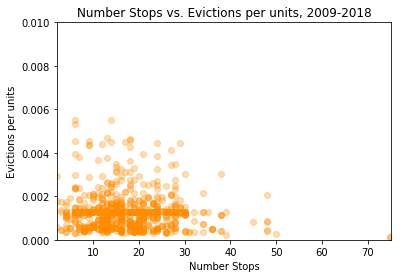

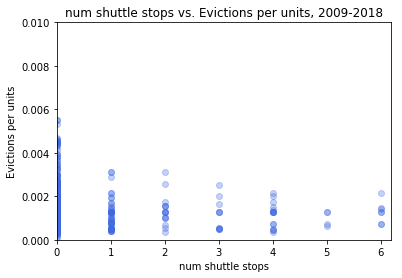

In [4]:
features = pd.read_csv('data/exploratory_data.csv')

colors = ['firebrick', 'gold', 'mediumseagreen', 'slateblue', 'mediumpurple', 'lightsalmon', 'saddlebrown',
         'sandybrown', 'lightskyblue', 'g', 'indigo', 'darkorange', 'royalblue']

for col, color in zip(features.columns[features.columns != 'Evictions per units'], colors):
    plt.scatter(features[col], features["Evictions per units"], c=color, alpha=.3)
    plt.title(col + " vs. Evictions per units, 2009-2018")
    plt.ylim((0, 0.01))
    plt.xlim((min(features[col]), max(features[col])+0.2))
    plt.ylabel("Evictions per units")
    plt.xlabel(col)
    plt.show()


### Feature Correlations

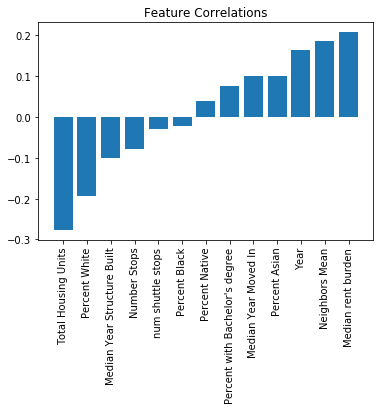

In [133]:
values = features.corr()["Evictions per units"].values
indices = features.corr()["Evictions per units"].index

sorted_one = sorted(zip(indices, values), key=lambda x: x[1])[:-1]
plt.bar([x[0] for x in sorted_one], [x[1] for x in sorted_one])
plt.title("Feature Correlations")
plt.xticks([x[0] for x in sorted_one], rotation='vertical', fontsize=10);
plt.show()

As the chart shows, none of the features are particularly highly correlated with the reponse, but some are more than others. The LASSO regression below helped me make the decision about which ones to include based on their correlation to the response.

### Load in Data and split into training, test sets

In [5]:
from sklearn.model_selection import train_test_split
features_df = pd.read_csv("data/features_with_shuttles.csv")
features = ['Total Housing Units','Percent Asian', 'Percent White', 'Percent Black','Median Year Structure Built',
           'Number Stops','Year', 'Percent Native', 'Median Year Moved In', 'Median rent burden', "Percent with Bachelor's degree",
           'Neighbors Mean', "Evictions per units", "geometry"]

features_df_keep = features_df.loc[:, features_df.columns.isin(features)]
#features_df_keep.to_csv('data/exploratory_data.csv', index=False)

X = features_df_keep.loc[:, features_df_keep.columns != 'Evictions per units']
y = features_df_keep.loc[:,'Evictions per units']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [6]:
def normalize_columns(data, mean_df, std_df):
    '''
    Input:
      data (data frame): contains only numeric columns
    Output:
      data frame, the same data, except each column is standardized 
      to have 0-mean and unit variance
    '''
    normalized_data=(data-mean_df.mean())/std_df.std()

    return normalized_data

In [7]:
def unnormalize_columns(data, mean_df, std_df):
    unnormalized_data=(data*std_df.std())+mean_df.mean()

    return unnormalized_data

In [8]:
normal_Xtrain = normalize_columns(X_train, X_train, X_train)
normal_Ytrain = normalize_columns(y_train, y_train, y_train)

### Feature Importance with LASSO
I chose features based on data availability, the time available to access and processs them, and my own existing understanding of factors related to eviction. Before fitting any of my models, I used LASSO to find out which of the 13 features I originally started with would be most useful for predicting number of evictions per housing unit in each census tract.


In [9]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from collections import OrderedDict

cv_alphas = np.linspace(1e-10, 1, 10000)

lasso = LassoCV(alphas=cv_alphas, normalize=False, max_iter=1e6).fit(normal_Xtrain, normal_Ytrain)
lcv_alpha_normal = lasso.alpha_
print("optimal alpha:", lcv_alpha_normal)

lasso_fit = Lasso(alpha=lcv_alpha_normal).fit(normal_Xtrain, normal_Ytrain)
lcoefficients = lasso_fit.coef_

lasso_coef_dict = OrderedDict()
for coef, feature in zip(lasso_fit.coef_, normal_Xtrain.columns):
    lasso_coef_dict[feature] = coef
sorted_coefs_lasso = OrderedDict(sorted(lasso_coef_dict.items(), key=lambda t: t[1]))
print("LASSO coefficients", sorted_coefs_lasso)


optimal alpha: 0.004100410140594059
LASSO coefficients OrderedDict([('Percent White', -0.5471435156731765), ('Percent Asian', -0.46630341926919655), ('Percent Black', -0.28313455111989716), ('Total Housing Units', -0.20935101189812588), ('Median Year Structure Built', -0.05755610041587326), ('geometry', -0.043605602035669766), ('Year', -0.0012268953707718256), ('Number Stops', 0.0), ('Percent Native', 0.015530680797340124), ('Median Year Moved In', 0.050092260835058355), ("Percent with Bachelor's degree", 0.09305936306298197), ('Median rent burden', 0.11894117451709639), ('Neighbors Mean', 0.14702656136229278)])


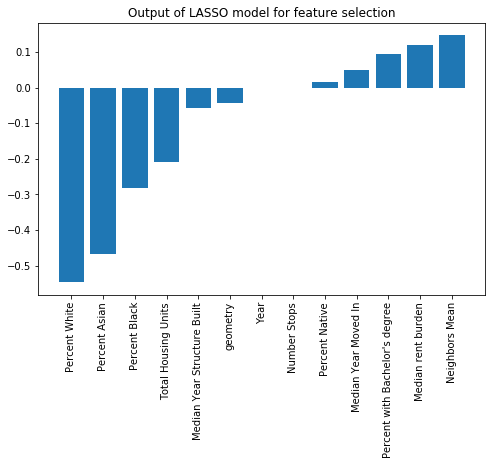

In [10]:
plt.figure(figsize=(8,5))
plt.bar(sorted_coefs_lasso.keys(), sorted_coefs_lasso.values())
plt.title("Output of LASSO model for feature selection")
plt.xticks(list(sorted_coefs_lasso.keys()), rotation='vertical', fontsize=10)
plt.show()

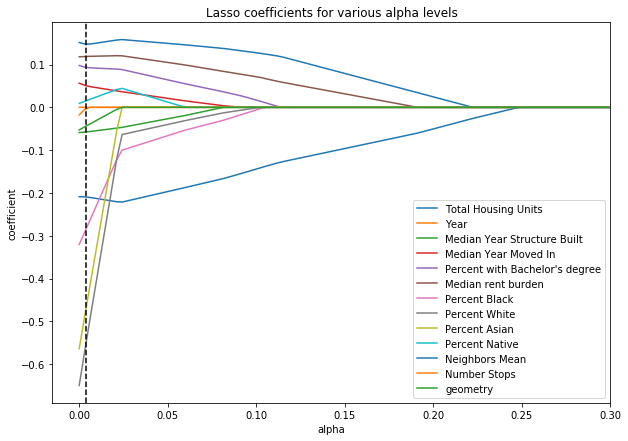

In [11]:
from sklearn.linear_model import Lasso
num_features = 13
lasso_coeffs = [[] for _ in range(num_features)]
alphas = np.linspace(0.0001, 0.3, 100)
for alpha in alphas:
    lasso_fit = Lasso(alpha=alpha).fit(normal_Xtrain, normal_Ytrain)
    for i, c in enumerate(lasso_fit.coef_):
        lasso_coeffs[i].append(c)
        
fig= plt.figure(figsize=(10,7))
for i, coeffs in enumerate(lasso_coeffs):
    plt.plot(alphas, coeffs, label=X_train.columns[i]);
plt.axvline(lcv_alpha_normal, c='black', ls='dashed')
plt.title("Lasso coefficients for various alpha levels")
plt.xlabel("alpha")
plt.xlim(-0.015, 0.3)
plt.ylabel("coefficient")
plt.legend();


The chart above shows the LASSO regression with various different alpha values. The black dotted line shows the optimal alpha level used by the LASSO model, as determined by LassoCV.

## Forecasting and Prediction Modeling (25 points)

This section is where the rubber meets the road.  In it you must:
1. Explore at least 3 prediction modeling approaches, ranging from the simple (e.g. linear regression, KNN) to the complex (e.g. SVM, random forests, Lasso).  
2. Motivate all your modeling decisions.  This includes parameter choices (e.g., how many folds in k-fold cross validation, what time window you use for averaging your data) as well as model form (e.g., If you use regression trees, why?  If you include nonlinear features in a regression model, why?). 
1. Carefully describe your cross validation and model selection process. 
3. Evaluate your models' performance.  How much total error is there?  Where do you see bias?  Where do you see variance? 
4. Very carefully document your workflow.  We will be reading a lot of projects, so we need you to explain each basic step in your analysis.  
5. Seek opportunities to compartmentalize the details of the workflow into functions.  


In [12]:
#split the new features dataframe without the features lasso removed into train test 
selected_features = features_df_keep.loc[:, ~(features_df_keep.columns.isin(['Percent Native', 'Year']))]

X_l = selected_features.loc[:, selected_features.columns != 'Evictions per units']
y_l = selected_features.loc[:,'Evictions per units']
X_ltrain, X_ltest, y_ltrain, y_ltest = train_test_split(X_l, y_l, test_size = 0.20)
#X_ltrain.head()

In [13]:
#normalize the new training data 
normal_X_ltrain = normalize_columns(X_ltrain, X_ltrain, X_ltrain)
normal_y_ltrain = normalize_columns(y_ltrain, y_ltrain, y_ltrain)
normal_X_1test = normalize_columns(X_ltest, X_ltrain, X_ltrain)


### K Nearest Neighbors Regressor

#### Model Training

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
n_dict = {"n_neighbors": [36, 38, 40, 42, 44, 46, 48, 50, 52, 54]} 

gsearch = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=n_dict, cv= 10)

gsearch_search_fit = gsearch.fit(normal_X_ltrain, normal_y_ltrain)

optimal_n_neighbors = gsearch_search_fit.best_params_['n_neighbors']
print(optimal_n_neighbors)

50


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

kn_regressor = KNeighborsRegressor(n_neighbors=optimal_n_neighbors)
kn_regressor_fit = kn_regressor.fit(normal_X_ltrain, normal_y_ltrain)

normal_y_pred_train = kn_regressor.predict(normal_X_ltrain)
y_pred_train = unnormalize_columns(normal_y_pred_train, y_ltrain, y_ltrain)

train_mse = mean_squared_error(y_pred_train, y_ltrain)
train_mae = mean_absolute_error(y_pred_train, y_ltrain)

normal_y_pred_test = kn_regressor.predict(normal_X_1test)
y_pred_test = unnormalize_columns(normal_y_pred_test, y_ltrain, y_ltrain)

test_mse = mean_squared_error(y_pred_test, y_ltest)
test_mae = mean_absolute_error(y_pred_test, y_ltest)



print('training mse:', train_mse)
print('training mae:', train_mae)
print('test mse:', test_mse)
print('test mae:', test_mae)

training mse: 6.038372788820468e-07
training mae: 0.0004982473876362826
test mse: 3.874216516935838e-07
test mae: 0.00039943138554891447


### Model Prediction

In [16]:
#loading in the test data to be used for prediction of 2019 eviction rates

test_features_df = pd.read_csv('data/test_features_17_with_shuttles.csv')
test_features = ['Total Housing Units','Percent Asian', 'Percent White', 'Percent Black','Median Year Structure Built',
           'Number Stops','Year', 'Percent Native', 'Median Year Moved In', 'Median rent burden', "Percent with Bachelor's degree",
           'Neighbors Mean', "geometry"]

X_future = test_features_df.loc[:, test_features_df.columns.isin(test_features)]

#use only the features selected by the LASSO regression
selected_features_future = X_future.loc[:, ~(X_future.columns.isin(['Percent Native', 'Year']))]
selected_features_future.head()

,Total Housing Units,Median Year Structure Built,Median Year Moved In,Percent with Bachelor's degree,Median rent burden,Percent Black,Percent White,Percent Asian,Neighbors Mean,Number Stops,geometry
0,3056.000000,1939.000000,2011.000000,44.300000,23.300000,0.007793,0.842769,0.111850,1.0,32,0.0
1,2379.000000,1939.000000,2010.000000,38.100000,21.000000,0.000000,0.618689,0.330135,3.0,13,0.0
2,2005.522124,1943.230088,2009.823009,32.619469,27.650442,0.039850,0.461255,0.359640,3.0,13,0.0
3,2883.000000,1939.000000,2008.000000,37.400000,23.300000,0.000215,0.596771,0.284177,6.0,24,0.0
4,2005.522124,1943.230088,2009.823009,32.619469,27.650442,0.039850,0.461255,0.359640,6.0,24,0.0


In [17]:
#normalize data and use KNN regressor to predict using the test features data. Make a prediction 
#for # evictions/housing unit in all census tracts for 2019
normal_X_future_selected = normalize_columns(selected_features_future, X_ltrain, X_ltrain)
normal_knn_y_future_pred = kn_regressor.predict(normal_X_future_selected)
knn_y_future_pred = unnormalize_columns(normal_knn_y_future_pred, y_ltrain, y_ltrain)
knn_prediction = pd.DataFrame(test_features_df["Geoid"], columns=["Geoid"])
knn_prediction['prediction'] = knn_y_future_pred
knn_prediction.head()


,Geoid,prediction
0,6075010200,0.001206
1,6075010300,0.001245
2,6075010300,0.001282
3,6075010400,0.001241
4,6075010400,0.001251


In [36]:
census_tracts = gp.read_file('/Users/ameliabaum/Desktop/Amelia/Berkeley 2018-2019/EnRes C190/evictionmodel_190final/data/cb_2017_06_tract_500k/cb_2017_06_tract_500k.shp')
sf_tracts = census_tracts[census_tracts['COUNTYFP'] == '075']
sf_tracts["Geoid_int"] = sf_tracts["GEOID"].astype(int)

knn_prediction_with_tracts = knn_prediction.merge(sf_tracts, how='left', left_on='Geoid', right_on='Geoid_int')
knn_prediction_with_tracts[["prediction", "Geoid", "geometry"]]
knn_prediction_with_tracts.to_csv('data/knn_prediction.csv', index=False)

/Users/ameliabaum/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Ridge Regression

#### Model Training

In [39]:
from sklearn.linear_model import RidgeCV, ridge
cv_alphas = np.linspace(0.0001, 100, 1000) #consider changing these

ridgeCV = RidgeCV(cv_alphas, normalize=False, scoring='neg_mean_squared_error').fit(normal_X_ltrain, normal_y_ltrain)
rcv_alpha = ridgeCV.alpha_

ridge_alpha = ridge.Ridge(alpha=rcv_alpha).fit(normal_X_ltrain, normal_y_ltrain)


y_pred_normal_train = ridge_alpha.predict(normal_X_ltrain)
y_pred_train = unnormalize_columns(y_pred_normal_train, y_ltrain, y_ltrain)

train_mse = mean_squared_error(y_pred_train, y_ltrain) #unstandardized

#test error
normal_X_ltest = normalize_columns(X_ltest, X_ltrain, X_ltrain)
y_pred_normal_test = ridge_alpha.predict(normal_X_ltest)
y_pred_test = unnormalize_columns(y_pred_normal_test, y_ltrain, y_ltrain)

test_mse = mean_squared_error(y_pred_test, y_ltest) #unstandardized

                                     
print("optimal alpha from CV", rcv_alpha)
print("training mse", train_mse)
print("test mse", test_mse)

optimal alpha from CV 1.7018
training mse 5.449016914966377e-07
test mse 3.612074273210431e-07


#### Model Prediction

In [40]:
normal_ridge_y_future_pred = ridge_alpha.predict(normal_X_future_selected)
ridge_y_future_pred = unnormalize_columns(normal_ridge_y_future_pred, y_ltrain, y_ltrain)
ridge_prediction = pd.DataFrame(test_features_df["Geoid"], columns=["Geoid"])
ridge_prediction['prediction'] = ridge_y_future_pred
ridge_prediction.head()

,Geoid,prediction
0,6075010200,0.000671
1,6075010300,0.000914
2,6075010300,0.001405
3,6075010400,0.001168
4,6075010400,0.001525


In [41]:

ridge_prediction_with_tracts = ridge_prediction.merge(sf_tracts, how='left', left_on='Geoid', right_on='Geoid_int')
ridge_prediction_with_tracts[["prediction", "Geoid", "geometry"]]
ridge_prediction_with_tracts.to_csv('data/ridge_prediction.csv', index=False)

### Random Forest Regression

#### Model Training


In [181]:
#This takes a super long time to run, but I have copied the optimal params in the cell below so no need to re-run it!


# from sklearn.ensemble import RandomForestRegressor

# param_dict2 = {"n_estimators": [30, 50, 100, 130],
#              "max_depth": [350, 400, 450, 500],
#              "min_samples_split": [4, 8, 12],
#              "min_samples_leaf": [2, 5],
#              "max_features": ["auto", "log2", None]}

# gsearch = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_dict2, cv=10, verbose=1)

# gsearch_search_fit = gsearch.fit(normal_X_ltrain, normal_y_ltrain)

# optimal_forest_params2 = gsearch_search_fit.best_params_
# print(optimal_forest_params2)

/Users/ameliabaum/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Fitting 10 folds for each of 288 candidates, totalling 2880 fits
{'max_depth': 400, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 100}


[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed:  6.7min finished


In [44]:
optimal_forest_params2 = {'max_depth': 400, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 100}

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(max_depth= 450, max_features= optimal_forest_params2['max_features'], 
                                min_samples_leaf= optimal_forest_params2['min_samples_leaf'], min_samples_split= optimal_forest_params2['min_samples_split'], 
                                 n_estimators= optimal_forest_params2['n_estimators'])
rf_tree_fit = rf_tree.fit(X_ltrain, y_ltrain)

rf_train_score = rf_tree.score(X_ltrain, y_ltrain)
rf_test_score = rf_tree.score(X_ltest, y_ltest)


print('Train Score (R2): ', rf_train_score)

print('Test Score (R2): ', rf_test_score)

Train Score (R2):  0.48432200769988254
Test Score (R2):  0.24294750299543932


/Users/ameliabaum/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Model Prediction for 2019


In [46]:
normal_rf_y_future_pred = rf_tree.predict(normal_X_future_selected)
rf_y_future_pred = unnormalize_columns(normal_rf_y_future_pred, y_ltrain, y_ltrain)
rf_prediction = pd.DataFrame(test_features_df["Geoid"], columns=["Geoid"])
rf_prediction['prediction'] = rf_y_future_pred
rf_prediction.head()

,Geoid,prediction
0,6075010200,0.001289
1,6075010300,0.001289
2,6075010300,0.001289
3,6075010400,0.001289
4,6075010400,0.001289


In [48]:
randomforest_prediction_with_tracts = rf_prediction.merge(sf_tracts, how='left', left_on='Geoid', right_on='Geoid_int')
randomforest_prediction_with_tracts[["prediction", "Geoid", "geometry"]]
randomforest_prediction_with_tracts.to_csv('data/randomforest_prediction.csv', index=False)

### Nueral Network

#### Model Training


In [50]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=5, activation='relu', input_dim=11))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='rmsprop', loss='mse')

history = model.fit(normal_X_ltrain, normal_y_ltrain, epochs=1000, batch_size=32)

Using TensorFlow backend.


Epoch 1/1000
665/665 [==============================] - 0s 242us/step - loss: 1.2695
Epoch 2/1000
665/665 [==============================] - 0s 79us/step - loss: 1.1241
Epoch 3/1000
665/665 [==============================] - 0s 64us/step - loss: 1.0573
Epoch 4/1000
665/665 [==============================] - 0s 67us/step - loss: 1.0231
Epoch 5/1000
665/665 [==============================] - 0s 66us/step - loss: 1.0025
Epoch 6/1000
665/665 [==============================] - 0s 68us/step - loss: 0.9905
Epoch 7/1000
665/665 [==============================] - 0s 68us/step - loss: 0.9826
Epoch 8/1000
665/665 [==============================] - 0s 69us/step - loss: 0.9776
Epoch 9/1000
665/665 [==============================] - 0s 69us/step - loss: 0.9730
Epoch 10/1000
665/665 [==============================] - 0s 65us/step - loss: 0.9688
Epoch 11/1000
665/665 [==============================] - 0s 58us/step - loss: 0.9657
Epoch 12/1000
665/665 [==============================] - 0s 53us/step - l

665/665 [==============================] - 0s 67us/step - loss: 0.7354
Epoch 98/1000
665/665 [==============================] - 0s 67us/step - loss: 0.7343
Epoch 99/1000
665/665 [==============================] - 0s 68us/step - loss: 0.7337
Epoch 100/1000
665/665 [==============================] - 0s 65us/step - loss: 0.7317
Epoch 101/1000
665/665 [==============================] - 0s 62us/step - loss: 0.7316
Epoch 102/1000
665/665 [==============================] - 0s 67us/step - loss: 0.7294
Epoch 103/1000
665/665 [==============================] - 0s 72us/step - loss: 0.7294
Epoch 104/1000
665/665 [==============================] - 0s 62us/step - loss: 0.7278
Epoch 105/1000
665/665 [==============================] - 0s 68us/step - loss: 0.7271
Epoch 106/1000
665/665 [==============================] - 0s 68us/step - loss: 0.7261
Epoch 107/1000
665/665 [==============================] - 0s 91us/step - loss: 0.7251
Epoch 108/1000
665/665 [==============================] - 0s 77us/step 

665/665 [==============================] - 0s 50us/step - loss: 0.6794
Epoch 193/1000
665/665 [==============================] - 0s 52us/step - loss: 0.6794
Epoch 194/1000
665/665 [==============================] - 0s 50us/step - loss: 0.6795
Epoch 195/1000
665/665 [==============================] - 0s 52us/step - loss: 0.6792
Epoch 196/1000
665/665 [==============================] - 0s 53us/step - loss: 0.6780
Epoch 197/1000
665/665 [==============================] - 0s 50us/step - loss: 0.6784
Epoch 198/1000
665/665 [==============================] - 0s 51us/step - loss: 0.6780
Epoch 199/1000
665/665 [==============================] - 0s 49us/step - loss: 0.6782
Epoch 200/1000
665/665 [==============================] - 0s 54us/step - loss: 0.6767
Epoch 201/1000
665/665 [==============================] - 0s 50us/step - loss: 0.6776
Epoch 202/1000
665/665 [==============================] - 0s 52us/step - loss: 0.6770
Epoch 203/1000
665/665 [==============================] - 0s 51us/ste

665/665 [==============================] - 0s 61us/step - loss: 0.6508
Epoch 288/1000
665/665 [==============================] - 0s 44us/step - loss: 0.6508
Epoch 289/1000
665/665 [==============================] - 0s 37us/step - loss: 0.6509
Epoch 290/1000
665/665 [==============================] - 0s 67us/step - loss: 0.6516
Epoch 291/1000
665/665 [==============================] - 0s 61us/step - loss: 0.6502
Epoch 292/1000
665/665 [==============================] - 0s 62us/step - loss: 0.6497
Epoch 293/1000
665/665 [==============================] - 0s 63us/step - loss: 0.6500
Epoch 294/1000
665/665 [==============================] - 0s 76us/step - loss: 0.6485
Epoch 295/1000
665/665 [==============================] - 0s 77us/step - loss: 0.6493
Epoch 296/1000
665/665 [==============================] - 0s 64us/step - loss: 0.6487
Epoch 297/1000
665/665 [==============================] - 0s 64us/step - loss: 0.6485
Epoch 298/1000
665/665 [==============================] - 0s 63us/ste

665/665 [==============================] - 0s 56us/step - loss: 0.6334
Epoch 383/1000
665/665 [==============================] - 0s 59us/step - loss: 0.6326
Epoch 384/1000
665/665 [==============================] - 0s 56us/step - loss: 0.6323
Epoch 385/1000
665/665 [==============================] - 0s 52us/step - loss: 0.6343
Epoch 386/1000
665/665 [==============================] - 0s 66us/step - loss: 0.6336
Epoch 387/1000
665/665 [==============================] - 0s 60us/step - loss: 0.6324
Epoch 388/1000
665/665 [==============================] - 0s 58us/step - loss: 0.6321
Epoch 389/1000
665/665 [==============================] - 0s 59us/step - loss: 0.6326
Epoch 390/1000
665/665 [==============================] - 0s 61us/step - loss: 0.6321
Epoch 391/1000
665/665 [==============================] - 0s 65us/step - loss: 0.6324
Epoch 392/1000
665/665 [==============================] - 0s 67us/step - loss: 0.6321
Epoch 393/1000
665/665 [==============================] - 0s 64us/ste

665/665 [==============================] - 0s 40us/step - loss: 0.6181
Epoch 478/1000
665/665 [==============================] - 0s 52us/step - loss: 0.6196
Epoch 479/1000
665/665 [==============================] - 0s 58us/step - loss: 0.6177
Epoch 480/1000
665/665 [==============================] - 0s 59us/step - loss: 0.6206
Epoch 481/1000
665/665 [==============================] - 0s 49us/step - loss: 0.6177
Epoch 482/1000
665/665 [==============================] - 0s 56us/step - loss: 0.6199
Epoch 483/1000
665/665 [==============================] - 0s 54us/step - loss: 0.6187
Epoch 484/1000
665/665 [==============================] - 0s 57us/step - loss: 0.6186
Epoch 485/1000
665/665 [==============================] - 0s 67us/step - loss: 0.6195
Epoch 486/1000
665/665 [==============================] - 0s 58us/step - loss: 0.6183
Epoch 487/1000
665/665 [==============================] - 0s 59us/step - loss: 0.6185
Epoch 488/1000
665/665 [==============================] - 0s 58us/ste

665/665 [==============================] - 0s 69us/step - loss: 0.6130
Epoch 573/1000
665/665 [==============================] - 0s 61us/step - loss: 0.6132
Epoch 574/1000
665/665 [==============================] - 0s 68us/step - loss: 0.6142
Epoch 575/1000
665/665 [==============================] - 0s 60us/step - loss: 0.6134
Epoch 576/1000
665/665 [==============================] - 0s 63us/step - loss: 0.6130
Epoch 577/1000
665/665 [==============================] - 0s 62us/step - loss: 0.6128
Epoch 578/1000
665/665 [==============================] - 0s 63us/step - loss: 0.6135
Epoch 579/1000
665/665 [==============================] - 0s 62us/step - loss: 0.6135
Epoch 580/1000
665/665 [==============================] - 0s 63us/step - loss: 0.6126
Epoch 581/1000
665/665 [==============================] - 0s 62us/step - loss: 0.6121
Epoch 582/1000
665/665 [==============================] - 0s 63us/step - loss: 0.6127
Epoch 583/1000
665/665 [==============================] - 0s 63us/ste

665/665 [==============================] - 0s 58us/step - loss: 0.6074
Epoch 668/1000
665/665 [==============================] - 0s 57us/step - loss: 0.6077
Epoch 669/1000
665/665 [==============================] - 0s 58us/step - loss: 0.6075
Epoch 670/1000
665/665 [==============================] - 0s 72us/step - loss: 0.6068
Epoch 671/1000
665/665 [==============================] - 0s 63us/step - loss: 0.6069
Epoch 672/1000
665/665 [==============================] - 0s 62us/step - loss: 0.6074
Epoch 673/1000
665/665 [==============================] - 0s 57us/step - loss: 0.6068
Epoch 674/1000
665/665 [==============================] - 0s 59us/step - loss: 0.6070
Epoch 675/1000
665/665 [==============================] - 0s 63us/step - loss: 0.6057
Epoch 676/1000
665/665 [==============================] - 0s 58us/step - loss: 0.6078
Epoch 677/1000
665/665 [==============================] - 0s 66us/step - loss: 0.6065
Epoch 678/1000
665/665 [==============================] - 0s 67us/ste

665/665 [==============================] - 0s 58us/step - loss: 0.6047
Epoch 763/1000
665/665 [==============================] - 0s 59us/step - loss: 0.6033
Epoch 764/1000
665/665 [==============================] - 0s 54us/step - loss: 0.6038
Epoch 765/1000
665/665 [==============================] - 0s 65us/step - loss: 0.6030
Epoch 766/1000
665/665 [==============================] - 0s 63us/step - loss: 0.6048
Epoch 767/1000
665/665 [==============================] - 0s 62us/step - loss: 0.6030
Epoch 768/1000
665/665 [==============================] - 0s 62us/step - loss: 0.6037
Epoch 769/1000
665/665 [==============================] - 0s 65us/step - loss: 0.6026
Epoch 770/1000
665/665 [==============================] - 0s 59us/step - loss: 0.6025
Epoch 771/1000
665/665 [==============================] - 0s 68us/step - loss: 0.6035
Epoch 772/1000
665/665 [==============================] - 0s 58us/step - loss: 0.6030
Epoch 773/1000
665/665 [==============================] - 0s 63us/ste

665/665 [==============================] - 0s 65us/step - loss: 0.5994
Epoch 858/1000
665/665 [==============================] - 0s 65us/step - loss: 0.5998
Epoch 859/1000
665/665 [==============================] - 0s 68us/step - loss: 0.6013
Epoch 860/1000
665/665 [==============================] - 0s 70us/step - loss: 0.5989
Epoch 861/1000
665/665 [==============================] - 0s 65us/step - loss: 0.6004
Epoch 862/1000
665/665 [==============================] - 0s 63us/step - loss: 0.6002
Epoch 863/1000
665/665 [==============================] - 0s 70us/step - loss: 0.5997
Epoch 864/1000
665/665 [==============================] - 0s 64us/step - loss: 0.5995
Epoch 865/1000
665/665 [==============================] - 0s 62us/step - loss: 0.5990
Epoch 866/1000
665/665 [==============================] - 0s 66us/step - loss: 0.5993
Epoch 867/1000
665/665 [==============================] - 0s 67us/step - loss: 0.5990
Epoch 868/1000
665/665 [==============================] - 0s 62us/ste

665/665 [==============================] - 0s 55us/step - loss: 0.5949
Epoch 953/1000
665/665 [==============================] - 0s 56us/step - loss: 0.5943
Epoch 954/1000
665/665 [==============================] - 0s 54us/step - loss: 0.5931
Epoch 955/1000
665/665 [==============================] - 0s 61us/step - loss: 0.5955
Epoch 956/1000
665/665 [==============================] - 0s 62us/step - loss: 0.5946
Epoch 957/1000
665/665 [==============================] - 0s 60us/step - loss: 0.5932
Epoch 958/1000
665/665 [==============================] - 0s 62us/step - loss: 0.5944
Epoch 959/1000
665/665 [==============================] - 0s 64us/step - loss: 0.5951
Epoch 960/1000
665/665 [==============================] - 0s 67us/step - loss: 0.5942
Epoch 961/1000
665/665 [==============================] - 0s 66us/step - loss: 0.5942
Epoch 962/1000
665/665 [==============================] - 0s 61us/step - loss: 0.5943
Epoch 963/1000
665/665 [==============================] - 0s 66us/ste

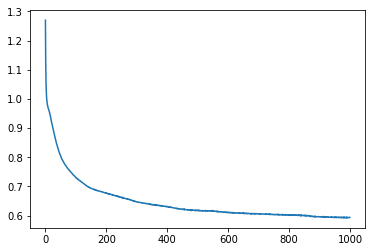

In [51]:
plt.plot(history.history['loss'])

In [52]:
normal_y_ltest_pred = model.predict(normal_X_ltest)
y_ltest_pred = unnormalize_columns(normal_y_ltest_pred, y_ltest, y_ltest)

print("test mse:", mean_squared_error(y_ltest_pred, y_ltest))

test mse: 4.7294876574190115e-07


#### Model Prediction


In [53]:
normal_nn_y_future_pred = model.predict(normal_X_future_selected)
nn_y_future_pred = unnormalize_columns(normal_nn_y_future_pred, y_ltrain, y_ltrain)
nn_prediction = pd.DataFrame(test_features_df["Geoid"], columns=["Geoid"])
nn_prediction['prediction'] = nn_y_future_pred
nn_prediction.head()


,Geoid,prediction
0,6075010200,0.001128
1,6075010300,0.000992
2,6075010300,0.001159
3,6075010400,0.001310
4,6075010400,0.001362


In [54]:
nn_prediction_with_tracts = nn_prediction.merge(sf_tracts, how='left', left_on='Geoid', right_on='Geoid_int')
nn_prediction_with_tracts[["prediction", "Geoid", "geometry"]]
nn_prediction_with_tracts.to_csv('data/neuralnetwork_prediction.csv', index=False)

In [59]:
#<iframe width="100%" height="520" frameborder="0" src="https://ameliarosebaum.carto.com/builder/6cfa81f2-6ea0-4687-8e28-8db4b37550fd/embed" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>
# Display the associated webpage in a new window
import IPython
url = 'https://ameliarosebaum.carto.com/builder/6cfa81f2-6ea0-4687-8e28-8db4b37550fd/embed'
iframe = '<iframe src=' + url + ' width=800 height=550></iframe>'
IPython.display.HTML(iframe)





## Interpretation and Conclusions (20 points)
In this section you must relate your modeling and forecasting results to your original research question.  You must 
1. Put your numeric or TRUE/FALSE answers into context.  What do the answers mean? What advice would you give a decision maker on the basis of your results?  Why should the reader care about your results?
2. Discuss caveats and / or reasons your results might be flawed.  No model is perfect, and understanding a model's imperfections is extremely important for the purpose of knowing how to interpret your results.  Often, we know the model output is wrong but we can assign a direction for its bias.  This helps to understand whether or not your answers are conservative.  

Shoot for 500-1000 words for this section.